In [1]:
# Standard imports
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

%matplotlib notebook

## Data Exploration

In [2]:
# load in the S&P 500 historical data
sp500_df = pd.read_csv('../data/GSPC.csv')

# define an array that measures in years -- we'll need it for fitting later
t_years = np.array(list(range(0, np.shape(sp500_df['Open'])[0])))/365.

In [86]:
# take a peak at the structure of the data
sp500_df.head()
sp500_df.tail()

sp500_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_norm
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,1.897009
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,1.912654
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,1.905337
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,1.876714
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,1.893991


,Date,Open,High,Low,Close,Adj Close,Volume,Open_norm
23130,2020-02-03,3235.659912,3268.439941,3235.659912,3248.919922,3248.919922,3757910000,0.280539
23131,2020-02-04,3280.610107,3306.919922,3280.610107,3297.590088,3297.590088,3995320000,0.297990
23132,2020-02-05,3324.909912,3337.580078,3313.750000,3334.689941,3334.689941,4117730000,0.315175
23133,2020-02-06,3344.919922,3347.959961,3334.389893,3345.780029,3345.780029,3868370000,0.322745
23134,2020-02-07,3335.540039,3341.419922,3322.120117,3327.709961,3327.709961,3730650000,0.318692


,Open,High,Low,Close,Adj Close,Volume,Open_norm
count,23135.000000,23135.000000,23135.000000,23135.000000,23135.000000,2.313500e+04,23135.000000
mean,465.417805,468.087517,462.591294,465.521319,465.521319,7.337330e+08,0.080868
std,688.539723,691.981567,684.823107,688.661500,688.661500,1.432321e+09,0.525494
min,4.400000,4.400000,4.400000,4.400000,4.400000,0.000000e+00,-0.524781
25%,23.700001,23.700001,23.700001,23.700001,23.700001,1.230000e+06,-0.234218
50%,98.940002,99.709999,98.110001,98.930000,98.930000,1.673000e+07,-0.005426
75%,759.170013,766.820007,753.035004,759.505005,759.505005,4.773700e+08,0.194270
max,3344.919922,3347.959961,3334.389893,3345.780029,3345.780029,1.145623e+10,3.679967


Text(0.5, 0, 'time, financial years')

Text(0, 0.5, 'S&P 500 Value, $')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


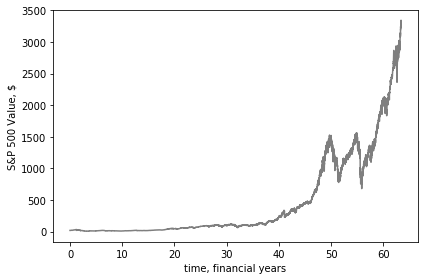

In [4]:
# lets look at the long term trend for the opening value
fig, ax = plt.subplots()
ax.plot(t_years, sp500_df['Open'], c='tab:gray')
ax.set_xlabel('time, financial years')
ax.set_ylabel('S&P 500 Value, $')
fig.tight_layout()
fig.savefig('sp500.pdf')
fig.show()

## Fitting to find the expected value

This curve looks like it may have some exponential growth trend to it, so it would be good to isolate the exponential growth and look at a time-normalized value for the S&P 500.

Text(0.5, 0, 'time, financial years')

Text(0, 0.5, 'S&P 500 Value, $')

exponential e-fold growth time = 10.514183396623846 years


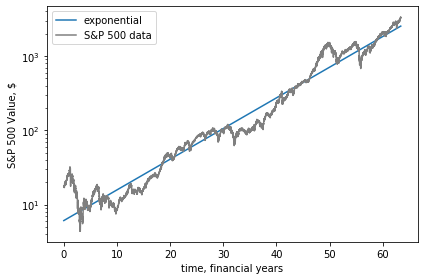

In [5]:
# Fit an exponential curve to the closing date, so we can normalize to the local average
oneOtau, a = np.polyfit(t_years, np.log(sp500_df['Open']), 1)
exp_fit = np.exp(oneOtau * t_years + a)

# Compare the fit to the real data on a semi-log plot
fig, ax = plt.subplots()
ax.semilogy(t_years, exp_fit, c='tab:blue', label='exponential')
ax.semilogy(t_years, sp500_df['Open'], c='tab:gray', label='S&P 500 data')
ax.set_xlabel('time, financial years')
ax.set_ylabel('S&P 500 Value, $')
ax.legend()
fig.tight_layout()
fig.savefig('exp_fit.png')

print('exponential e-fold growth time = {} years'.format(1/oneOtau))

Text(3, 150, 'Great Depression')

Text(20, 5, 'World War II')

Text(25, 25, 'Energy Crisis')

Text(45, 200, 'Great Recession')

Text(45, 3000, '90s Tech Bubble')

Text(0.5, 0, 'time, financial years')

Text(0, 0.5, 'S&P 500 Value, $')

exponential e-fold growth time = 10.514183396623846 years


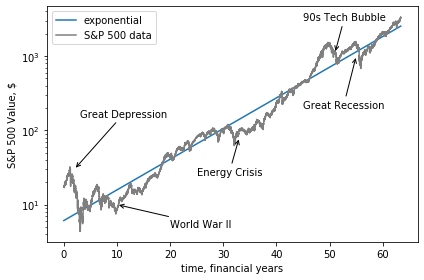

In [6]:
# Create an annotated curve for historical events
fig, ax = plt.subplots()
ax.semilogy(t_years, exp_fit, c='tab:blue', label='exponential')
ax.semilogy(t_years, sp500_df['Open'], c='tab:gray', label='S&P 500 data')

ax.annotate('Great Depression', xy=(2, 30), xytext=(3, 150),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate('World War II', xy=(10, 10), xytext=(20, 5),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate('Energy Crisis', xy=(33, 80), xytext=(25, 25),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate('Great Recession', xy=(55, 1000), xytext=(45, 200),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate('90s Tech Bubble', xy=(51, 1100), xytext=(45, 3000),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.set_xlabel('time, financial years')
ax.set_ylabel('S&P 500 Value, $')
ax.legend()
fig.tight_layout()
fig.savefig('exp_fit_annotated.png')

print('exponential e-fold growth time = {} years'.format(1/oneOtau))

A few interesting notes

1. This is a pretty good exponential fit, considering this data starts in 1927 and ends in 2020
2. From this, you expect the S&P 500 value to increase e-fold (2.72x) every 10.5 years, which is good to know from a financial planning standpoint

Text(3, 1.5, 'Great Depression')

Text(10, 0.5, 'World War II')

Text(25, 0.5, 'Energy Crisis')

Text(57, 1.0, 'Great Recession')

Text(40, -0.65, '90s Tech Bubble')

Text(0.5, 0, 'time, financial years')

Text(0, 0.5, 'Normalized S&P 500 Value')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


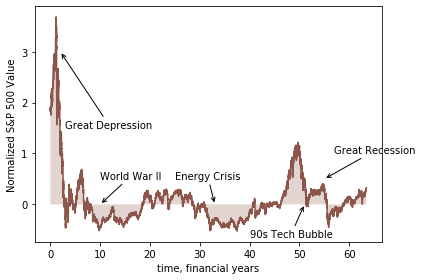

In [7]:
# Create a normed Open value
sp500_df['Open_norm'] = sp500_df['Open']/exp_fit - 1.

fig, ax = plt.subplots()
ax.plot(t_years, sp500_df['Open_norm'], c='tab:brown')
ax.fill_between(t_years, 0., sp500_df['Open_norm'], facecolor='tab:brown', alpha=0.25)

ax.annotate('Great Depression', xy=(2, 3), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate('World War II', xy=(10, 0.), xytext=(10, .5),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate('Energy Crisis', xy=(33, 0.), xytext=(25, .5),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate('Great Recession', xy=(55, .5), xytext=(57, 1.),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate('90s Tech Bubble', xy=(51, 0.), xytext=(40, -.65),
            arrowprops=dict(facecolor='black', arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.set_xlabel('time, financial years')
ax.set_ylabel('Normalized S&P 500 Value')
fig.tight_layout()
fig.savefig('sp500_normed.png')
fig.show()

## Computing the autocorrelation function

In [102]:
def autocorr(x):
    y = x# - np.mean(x)
    result = np.correlate(y, y, mode='full')
    #sigma_sqrd = np.var(y)
    return result[result.size // 2:]#/sigma_sqrd/len(y)

In [103]:
sp500_corr = autocorr(sp500_df['Open_norm'])
print(len(sp500_corr))
print(len(sp500_df['Open_norm']))

23135
23135


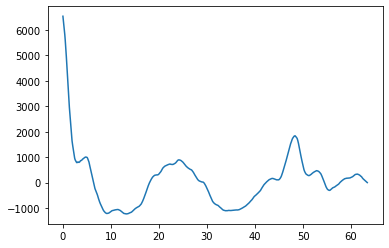

In [104]:
plt.plot(t_years, sp500_corr)